### 1.RNN

    1)LSTM1 - 문장을 판별

In [1]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.datasets import imdb
from keras import layers, models

In [2]:
# (1)데이터 준비
## 케라스가 제공하는 공개데이터인 IMDB 사용
## 25,000건의 영화평과 "이진화"된 영화 평점 정보(추천=1, 미추천=0)
## 평점정보는 별이 많은 경우 긍정, 적은 경우 부정
## max_len은 80으로 설정해둠. 넘어가는건 cut가능. 그럼, 80보다 적은 것들은? 맞춰줘야지 → pad_sequence로! (=padding)
class Data:
    def __init__(self, max_features=20000, maxlen=80):
        (self.x_train, self.y_train), (self.x_test, self.y_test) = imdb.load_data(num_words=max_features)
        self.x_train = sequence.pad_sequences(self.x_train, maxlen=maxlen)
        self.x_test = sequence.pad_sequences(self.x_test, maxlen=maxlen)

# (2)모델링 - 모델선언
## 임베딩 계층코드: 80*128로 변경, 노드 128개의 LSTM계층을 드롭아웃 설정한 히든레이서 생성
## 노드가 하.나.인 출력층 구성
class RNN_LSTM(models.Model):
    def __init__(self, max_features, maxlen):
        x = layers.Input((maxlen, ))
        h = layers.Embedding(max_features, 128)(x)
        h = layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)(h)
        y = layers.Dense(1, activation='sigmoid')(h)
        super().__init__(x, y)

        # try using different optimizers and different optimizer configs
        self.compile(loss='binary_crossentropy', 
                    optimizer='adam', metrics=['accuracy'])
        
# (3)학습 및 성능 평가
class Machine:
    ## 학습,성능 평가를 담당할 머신 클래스 생성
    def __init__(self, max_features=20000, maxlen=80):
        self.data = Data(max_features, maxlen)
        self.model = RNN_LSTM(max_features, maxlen)
    ## 학습과 평가를 수.행.할 run()멤버 함수 생성
    def run(self, epochs=3, batch_size=32):
        data = self.data
        model = self.model
        
        ## LSTM학습 코드
        print('Traing stage')
        print('============')
        model.fit(data.x_train, data.y_train, 
                batch_size=batch_size, epochs=epochs, 
                validation_data=(data.x_test, data.y_test))
        ## 학습 평가
        score, acc = model.evaluate(data.x_test, data.y_test, batch_size=batch_size)
        print('Test performance: accuracy={0}, loss={1}'.format(acc, score))        

# (4)학습 및 성능 평가 진행
m = Machine()
m.run()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Traing stage
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 79ms/step - accuracy: 0.7073 - loss: 0.5441 - val_accuracy: 0.8313 - val_loss: 0.3806
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.8796 - loss: 0.2999 - val_accuracy: 0.8318 - val_loss: 0.3940
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.9167 - loss: 0.2102 - val_accuracy: 0.8316 - val_loss: 0.4088
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8314 - loss: 0.4133
Test performance: accuracy=0.8316400051116943, loss=0.4088160991668701


    2)LSTM2 - 시계열 데이터 예측

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection # 데이터를 학습과 검증용으로 나눠 주는 함수
from keras import models, layers
from keraspp.keraspp import skeras

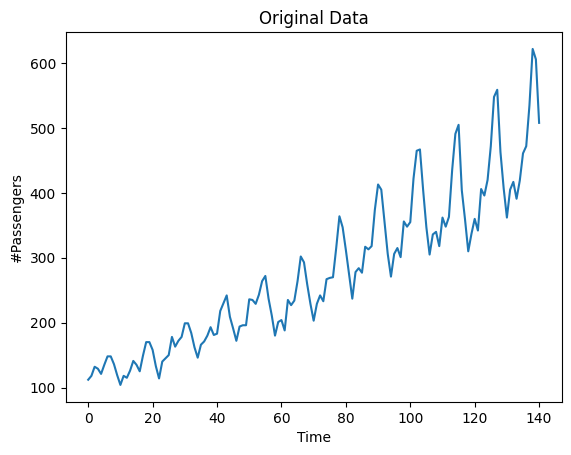

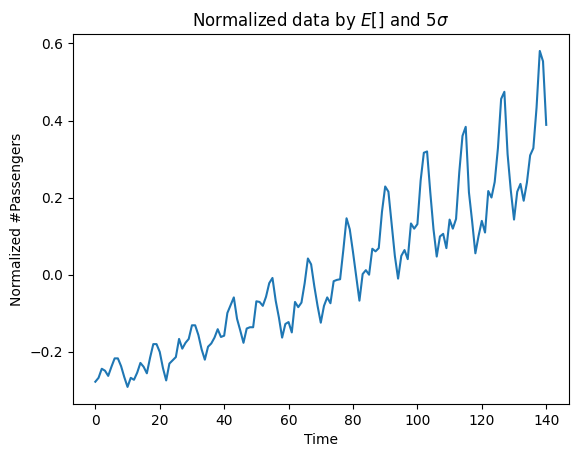

(128, 12, 1) (128,)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

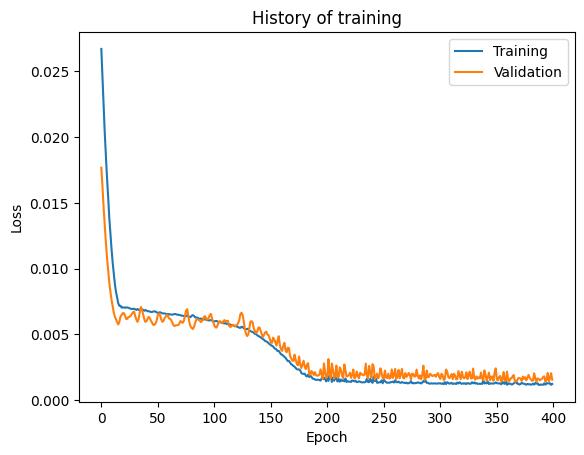

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0015
Loss:  0.0015396784292533994
(26,) (26,)


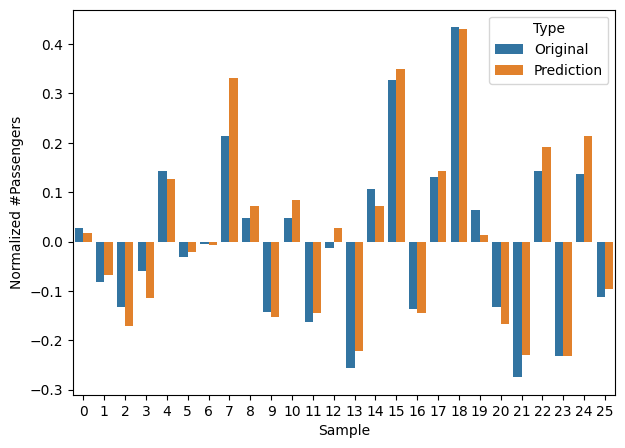

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


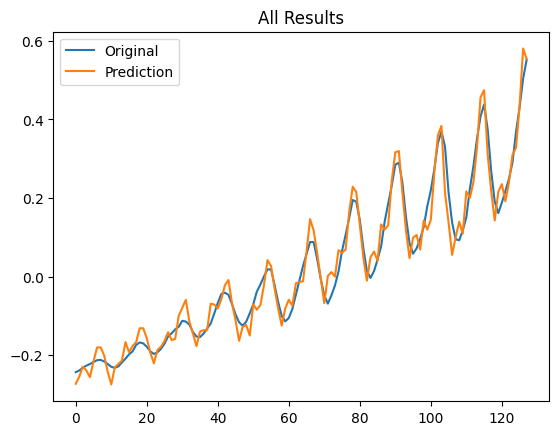

In [22]:
# 0)실행 함수
def main():
    machine = Machine()
    machine.run(epochs=400)

# 1)학습 및 평가 머신
class Machine():
    def __init__(self): # 머신클래스 초기화
        self.data = Dataset() # 데이터 생성
        shape = self.data.X.shape[1:] # LSTM입력계층의 크기를 shape변수에 정의
        self.model = rnn_model(shape) # rnn_model함수로 LSTM모델 만들어서 저장
    
    def run(self, epochs=400):
        d = self.data
        X_train, X_test, y_train, y_test = d.X_train, d.X_test, d.y_train, d.y_test
        X, y = d.X, d.y
        m = self.model
        # 모델 학습 진행
        h = m.fit(X_train, y_train, epochs=epochs, validation_data=[X_test, y_test], verbose=0)
        # 학습곡선 출력!!
        skeras.plot_loss(h)
        plt.title('History of training')
        plt.show()
        
        # 학습이 얼마나 잘 진행되는지 그래프 확인
        # 예측치가 얼마나 정확한지 하나의 그래프에 표시
        yp = m.predict(X_test).reshape(-1)
        print('Loss: ', m.evaluate(X_test, y_test))
        print(yp.shape, y_test.shape)

        df = pd.DataFrame()
        df['Sample'] = list(range(len(y_test))) * 2
        df['Normalized #Passengers'] = np.concatenate([y_test, yp], axis=0)
        df['Type'] = ['Original'] * len(y_test) + ['Prediction'] * len(yp)

        plt.figure(figsize=(7, 5))
        sns.barplot(x='Sample', y='Normalized #Passengers', hue='Type', data=df)
        plt.ylabel('Normalized #Passengers')
        plt.show()

        yp = m.predict(X)

        plt.plot(yp, label='Original')
        plt.plot(y, label='Prediction')
        plt.legend(loc=0)
        plt.title('All Results')
        plt.show()

# 2)LSTM시계열 데이터 회귀 모델링
def rnn_model(shape):
    m_x = layers.Input(shape=shape) # 입력계층
    m_h = layers.LSTM(10)(m_x) # LSTM계층 - 노드수는 10
    m_y = layers.Dense(1)(m_h) # 출력계층 - 이진판별이므로 노드 1이다
    m = models.Model(m_x, m_y)
    m.compile('adam', 'mean_squared_error')
    m.summary() # 모델 요약ㅇㅇ
    return m

# 3)데이터 가져오기
class Dataset:
    # 파일명과 시계열 길이가 주어진다. 12개월이므로 차원은 12
    def __init__(self, fname='./data/international-airline-passengers.csv', D=12):
        data_dn = load_data(fname=fname)
        self.X, self.y = get_Xy(data_dn, D=D)
        self.X_train, self.X_test, self.y_train, self.y_test = \
            model_selection.train_test_split(self.X, self.y, test_size=0.2, random_state=42)

def load_data(fname='./data/international-airline-passengers.csv'):
    dataset = pd.read_csv(fname, usecols=[1], engine='python', skipfooter=3)
    # original
    data = dataset.values.reshape(-1)
    plt.plot(data)
    plt.xlabel('Time'); plt.ylabel('#Passengers')
    plt.title('Original Data')
    plt.show()

    # data normailze(표준화): 승객수를 표준화 시킴!
    data_dn = (data - np.mean(data)) / np.std(data) / 5
    plt.plot(data_dn)
    plt.xlabel('Time'); plt.ylabel('Normalized #Passengers')
    plt.title('Normalized data by $E[]$ and $5\sigma$')
    plt.show()

    return data_dn

def get_Xy(data, D=12):
    # make X and y
    X_I = []
    y_I = []
    N = len(data)
    assert N > D, "N should be larget than D, where N is len(data)"
    # 샘플만큼의 결과 데이터를 한 칸씩 옮겨가며 시계열 벡터 생성
    for ii in range(N-D-1):
        X_I.append(data[ii:ii+D])
        y_I.append(data[ii+D])
    X = np.array(X_I)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.array(y_I)
    print(X.shape, y.shape)
    return X, y

main()

### 2)GAN

    1)확률분포 생성을 위한 완전 연결 계층 GAN구현

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras.layers import Dense, Conv1D, Reshape, Flatten, Lambda
from keras.optimizers import Adam
from keras import backend as K
from tensorflow.keras.optimizers import Adam

In [34]:
# (1)데이터 생성 클래스
class Data:
    def __init__(self, mu, sigma, ni_D): # ni_D: 받아들이는 변수의 수
        # 실제 데이터와 실제 데이터와 통계적 특성이 다른 무작위 잡음 데이터 2가지가 필요하다!
        # 랜덤 함수로 정규분포와 연속균등분포를 생성한다
        # 함수를 생성해서 lambda로 반환하고, lambda사용시 추후 원하는 수만큼 확률변수 만들기 가능하다
        self.real_sample = lambda n_batch: np.random.normal(mu, sigma, (n_batch, ni_D))
        self.in_sample = lambda n_batch: np.random_rand(n_batch, ni_D)

# (2)GAN모델링
## 입력벡터에 새 벡터를 추가(K.concatenate)
def add_decorate(x):
    m = K.mean(x, axis=-1, keepdims=True)
    d = K.square(x-m)
    return K.concatenate([x, d], axis=-1)
## 출력 데이터 모양 지정 함수 - 입력 노드의 크기를 출력 시 두배로 바꾼다
def add_decorate_shape(input_shape):
    shape = list(input_shape)
    assert len(shape) == 2
    shape[1] *= 2
    return tuple(shape)

## 정의한 신경망을 컴파일
## Adam클래스를 사용해서 파라미터 값 지정 & 학습속도는2e-4, beta값 각각 설정
lr = 2e-4 # 0.0002
adam = Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999)
def model_compile(model):
    return model.compile(loss='binary_crossentropy', optimizer=adam, 
                        metrics=['accuracy'])

class GAN:
    ## 판별망과 생성망 모델링하는 클래스 초기화
    def __init__(self,ni_D, nh_D, nh_G): ## 입력길이, 판멸망과 생성망의 은닉 계층 노드 수 지정
        self.ni_D = ni_D
        self.nh_D = nh_D
        self.nh_G = nh_G
        ## 판멸망, 생성망, 학습형 생성망 구성 후 변수에 할당
        self.D = self.gen_D()
        self.G = self.gen_G()
        self.GD = self.make_GD()
    
    ## 판별망 생성: 두 은닉 계층과 출력층 생성
    def gen_D(self):
        ni_D = self.ni_D
        nh_D = self.nh_D
        D = models.Sequential()
        D.add(Lambda(add_decorate, output_shape=add_decorate_shape, input_shape=(ni_D, )))
        D.add(Dense(nh_D, activation='relu'))
        D.add(Dense(nh_D, activation='relu'))
        D.add(Dense(1, activation='sigmoid'))

        model_compile(D)
        return D
    
    ## 생성망 생성: 생성망은 매번 ni_D만큼의 확률변수를 생성한다
    def gen_G(self):
        ni_D = self.ni_D
        nh_G = self.nh_D

        G = models.Sequential()
        G.add(Reshape((ni_D, 1), input_shape=(ni_D, )))
        G.add(Conv1D(nh_G, 1, activation='relu')) # ? 여기선 1D네
        G.add(Conv1D(nh_G, 1, activation='sigmoid'))
        G.add(Conv1D(1, 1))
        G.add(Flatten())

        model_compile(G)
        return G
    
    ## 학습용 생성망 구현 - 학습생성망? = 생성망을 학습시키는 가상 신경망
    ## 생성망 상단에 판별망을 달아주어 구현
    def make_GD(self):
        G, D = self.G, self.D
        GD = models.Sequential()
        GD.add(G) 
        GD.add(D)
        D.trainable = False
        model_compile(GD)
        D.trainable = True
        return GD
    
    ## 판별망의 학습 진행 함수
    ## 판별망은 생성망이 만든 출력을 허구 0으로 판단하고, 실제 신호를 1로 판단
    ## 이를 한번에 학습하고자 실제 신호 벡터와 생성망이 만든 허구 신호 벡터를 concat함수로 연결
    def D_train_on_batch(self, Real, Gen):
        D = self.D
        X = np.concatenate([Real, Gen], axis=0)
        y = np.array([1] * Real.shape[0] + [0] * Gen.shape[0])
        D.train_on_batch(X, y)
    
    ## 생성망의 학습 진행 함수
    ## 생성망에서 출력되는 허구값을 판별망에서 실젯값으로 판별하도록 학습해야 하므로, 목표 출력값을 모두 1로 설정
    ## train_on_batch로 학습 실시
    def GD_train_on_batch(self, Z):
        GD = self.GD
        y = np.array([1] * Z.shape[0])
        GD.train_on_batch(Z, y)

# (3)머신 구현
class Machine:
    def __init__(self, n_batch=10, ni_D=100):
        # GAN이 임의의 통계 특성을 지닌 정규분포를 생성하도록 평균값과 표준편차 설정
        data_mean = 4
        data_stddev = 1.25

        self.n_iter_D = 1
        self.n_iter_G = 5

        self.data = Data(data_mean, data_stddev, ni_D)
        self.gan = GAN(ni_D=ni_D, nh_D=50, nh_G=50)

        self.n_batch = n_batch

    def run(self, n_repeat=200, n_show=200, n_test=100):
        for ii in range(n_repeat):
            # n_show번 학습이 진행될 때마다 그 결과를 그래프로 표시
            print('Stage', ii, '(Epoch: {})'.format(ii * n_show))
            self.run_epochs(n_show, n_test)
            plt.show()

    def train_each(self):
        for it in range(self.n_iter_D):
            self.train_D()
        for it in range(self.n_iter_G):
            self.train_GD()

    def train(self, epochs):
        for epoch in range(epochs):
            self.train_each()
    
    def train_D(self):
        gan = self.gan
        n_batch = self.n_batch
        data = self.data

        # Real Data
        Real = data.real_sample(n_batch) # 실제 데이터에서 n_batch만큼 샘플 가져옴
        # Generated Data
        Z = data.in_sample(n_batch)
        Gen = gan.G.predict(Z)

        gan.D.trainable = True
        # 입력 샘플을 생성기에 통과시켜 생성망의 출력으로 바꾼다
        gan.D_train_on_batch(Real, Gen)

    # 머신 클래스에 들어갈 학.습.용 생성망을 학습하는 함수
    # 입력이 생성망에 들어가면 모든 판별망이 실제 샘플로 착각하도록 함수
    def train_GD(self):
        gan = self.gan
        n_batch = self.n_batch
        data = self.data
        # Seed data for data generation
        Z = data.in_sample(n_batch)

        gan.D.trainable = False
        gan.GD_train_on_batch(Z)

    # 학습 진행 경과에 대한 그래프
    def show_hist(self, Real, Gen, Z):
        plt.hist(Real.reshape(-1), histtype='step', label='Real')
        plt.hist(Gen.reshape(-1), histtype='step', label='Generated')
        plt.hist(Z.reshape(-1), histtype='step', label='Input')
        plt.legend(loc=0) # loc맞나?
    
    # 현재까지 학습된 GAN신경망의 성능평가
    # 객관적인 성능 확인을 위해 Real과 Gen데이터를 통계적 특성을 텍스트로 표시
    def test_and_show(self, n_test):
        data = self.data
        Gen, Z = self.test(n_test)
        Real = data.real_sample(n_test)
        self.show_hist(Real, Gen, Z)
        Machine.print_stat(Real, Gen)

    # 생성망이 얼마나 실제 데이터의 확률분포를 따르는 데이터를 만드는지 확인
    # Stat은 평균과 분산
    @staticmethod
    def print_stat(Real, Gen):
        def stat(d):
            return (np.mean(d), np.std(d))
        print('Mean and Std of Real: ', stat(Real))
        print('Mean and Std of Gen: ', stat(Gen))

def main():
    machine = Machine(n_batch=1, ni_D=100)
    machine.run(n_repeat=200, n_show=200, n_test=100)

main()

c:\Users\mario\Desktop\DLP_basis\myvenv\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Stage 0 (Epoch: 0)


AttributeError: 'Machine' object has no attribute 'run_epochs'